# Does the Tourism Preferences Changes after COVID19?

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnjji, ucfnlun, ucfnpar, ucfnrli.

## Green Space Data

In [20]:
# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import os

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

In [21]:
# Set up query
q1 = {
    "tourism":"camp_site",
    'leisure':'common',
    'leisure':'dog_park',
    'natural':'scrub',
    'natural':'fell',
    'landuse':'forest',
    'leisure':'garden',
    'landuse':'greenfield',
    'leisure':'golf_course',
    'landuse':'grass',
    'natural':'grassland',
    'natural':'heath',
    'landuse':'meadow',
    'natural':'moor',
    'leisure':'nature_reserve',
    'landuse':'orchard',
    'leisure':'park',
    'leisure':'pitch',
    'landuse':'recreation_ground',
    'landuse':'village_green',
    'landuse':'vineyard',
    'natural':'wood'
    }

greenspace = ox.geometries.geometries_from_place(
            'Greater London, UK',
            tags = q1,
            which_result=1)

greenspace.head(5)

geometry created_by barrier bicycle  \
element_type osmid                                                              
node         20851184    POINT (-0.33622 51.40443)        NaN     NaN     NaN   
             92273182    POINT (-0.40698 51.48916)       JOSM     NaN     NaN   
             895874399   POINT (-0.23028 51.55593)        NaN     NaN     NaN   
             920063079   POINT (-0.06894 51.56576)        NaN     NaN     NaN   
             1296074660  POINT (-0.17313 51.41807)        NaN     NaN     NaN   

                        foot source leisure                    name  \
element_type osmid                                                    
node         20851184    NaN    NaN   pitch  The Royal Tennis Court   
             92273182    NaN    NaN     NaN                     NaN   
             895874399   NaN    NaN   pitch      Kilburn Cosmos RFC   
             920063079   NaN    NaN   pitch                     NaN   
             1296074660  NaN    NaN   pitch                     NaN   

                             name:ru         sport  ... oneway construction  \
element_type osmid                                  ...                       
node         20851184    Реал-теннис   real_tennis  ...    NaN          NaN   
             92273182            NaN           NaN  ...    NaN          NaN   
             895874399           NaN         rugby  ...    NaN          NaN   
             920063079           NaN           NaN  ...    NaN          NaN   
             1296074660          NaN  table_tennis  ...    NaN          NaN   

                        proposed religion danger genus:en informal ways type  \
element_type osmid                                                             
node         20851184        NaN      NaN    NaN      NaN      NaN  NaN  NaN   
             92273182        NaN      NaN    NaN      NaN      NaN  NaN  NaN   
             895874399       NaN      NaN    NaN      NaN      NaN  NaN  NaN   
             920063079       NaN      NaN    NaN      NaN      NaN  NaN  NaN   
             1296074660      NaN      NaN    NaN      NaN      NaN  NaN  NaN   

                        network  
element_type osmid               
node         20851184       NaN  
             92273182       NaN  
             895874399      NaN  
             920063079      NaN  
             1296074660     NaN  

[5 rows x 278 columns]

In [22]:
greenspace.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 15452 entries, ('node', 20851184) to ('relation', 15268904)
Columns: 278 entries, geometry to network
dtypes: geometry(1), object(277)
memory usage: 33.4+ MB


In [23]:
path = os.path.join('data')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
greenspace.to_csv(os.path.join(path,'greenspace.csv'), index=False)

## Tourism Attraction Data

In [24]:
# Set up query
q2 = {'tourism':'attraction'}

# Run query
# Jin: I change ox.pois.pois_from_place to ox.geometries.geometries_from_place, for the adjustment of osmnx version change.
# details: https://stackoverflow.com/questions/71559143/what-happened-to-the-pois-module-in-osmnx-and-what-to-use-now
tourism_attraction = ox.geometries.geometries_from_place(
            'Greater London, UK',
            tags = q2,
            which_result=1)

tourism_attraction.head(5)

historic                      name     tourism  \
element_type osmid                                                       
node         25524252   building           Blewcoat School  attraction   
             26559743        NaN                       NaN  attraction   
             252602371       NaN  London Bridge Experience  attraction   
             269236138       NaN      Little Holland House  attraction   
             293221901       NaN    Hall Place and Gardens  attraction   

                        wikidata                        wikipedia  \
element_type osmid                                                  
node         25524252   Q4926413               en:Blewcoat School   
             26559743        NaN                              NaN   
             252602371  Q7748032  en:The London Bridge Experience   
             269236138       NaN                              NaN   
             293221901  Q5642615                              NaN   

                                         geometry access barrier bicycle  \
element_type osmid                                                         
node         25524252   POINT (-0.13606 51.49830)    NaN     NaN     NaN   
             26559743   POINT (-0.14525 51.39520)    NaN     NaN     NaN   
             252602371  POINT (-0.08826 51.50639)    NaN     NaN     NaN   
             269236138  POINT (-0.17065 51.35530)    NaN     NaN     NaN   
             293221901   POINT (0.16023 51.44819)    NaN     NaN     NaN   

                       place  ... int_name source:description name:ban  \
element_type osmid            ...                                        
node         25524252    NaN  ...      NaN                NaN      NaN   
             26559743    NaN  ...      NaN                NaN      NaN   
             252602371   NaN  ...      NaN                NaN      NaN   
             269236138   NaN  ...      NaN                NaN      NaN   
             293221901   NaN  ...      NaN                NaN      NaN   

                       name:eo name:hak name:mai name:pms name:tl name:sw  \
element_type osmid                                                          
node         25524252      NaN      NaN      NaN      NaN     NaN     NaN   
             26559743      NaN      NaN      NaN      NaN     NaN     NaN   
             252602371     NaN      NaN      NaN      NaN     NaN     NaN   
             269236138     NaN      NaN      NaN      NaN     NaN     NaN   
             293221901     NaN      NaN      NaN      NaN     NaN     NaN   

                       name:xmf  
element_type osmid               
node         25524252       NaN  
             26559743       NaN  
             252602371      NaN  
             269236138      NaN  
             293221901      NaN  

[5 rows x 359 columns]

In [25]:
tourism_attraction.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 344 entries, ('node', 25524252) to ('relation', 12942436)
Columns: 359 entries, historic to name:xmf
dtypes: geometry(1), object(358)
memory usage: 976.9+ KB


In [26]:
path = os.path.join('data')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
tourism_attraction.to_csv(os.path.join(path,'tourism_attraction.csv'), index=False)

## Airbnb data (Pre-precessing)

Aim: our dependent variable which represents the tourists' area(?) preference on choosing accommondation. 
It would be the estimates bookings of Airbnb listings in each area.

Workflow: 

    1. to get the number of review of all the listing has in the last 12 months,
    
    2. and calculate the estimates bookings for each Airbnb listings in the last 12 months according to review rate in London.
    
    3. ...sum up or times _an average length of stay_ (e.g. 5.5 nights)

### read in data

In [27]:
#Cachng the data
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """
    
    cache_data
    
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: str, dest: str) -> str
    cache_data



In [28]:
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/' # source path

In [29]:
IA_2022 = pd.read_csv( cache_data(spath+'2022-09-10-listings.csv.gz?raw=true', ddir) )
IA_2022.info()
# we should filter out the columns we need.

Found data/2022-09-10-listings.csv.gz locally!


/tmp/ipykernel_467/226973713.py:1: DtypeWarning: Columns (0,2,22,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  IA_2022 = pd.read_csv( cache_data(spath+'2022-09-10-listings.csv.gz?raw=true', ddir) )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69358 entries, 0 to 69357
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69354 non-null  object 
 1   listing_url                                   69357 non-null  object 
 2   scrape_id                                     69357 non-null  object 
 3   last_scraped                                  69357 non-null  object 
 4   source                                        69358 non-null  object 
 5   name                                          69337 non-null  object 
 6   description                                   67839 non-null  object 
 7   neighborhood_overview                         39966 non-null  object 
 8   picture_url                                   69358 non-null  object 
 9   host_id                                       69358 non-null 

In [30]:
IA_2019 = pd.read_csv(cache_data(spath+'London-2019-11-listings.csv.gz?raw=true', ddir),low_memory=False)
IA_2019.info()
# we need to fix the data type.

Found data/London-2019-11-listings.csv.gz locally!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85236 non-null  object
 1   name                            85236 non-null  object
 2   host_id                         85236 non-null  object
 3   host_name                       85236 non-null  object
 4   neighbourhood_group             85236 non-null  object
 5   neighbourhood                   85236 non-null  object
 6   latitude                        85236 non-null  object
 7   longitude                       85236 non-null  object
 8   room_type                       85236 non-null  object
 9   price                           85236 non-null  object
 10  minimum_nights                  85236 non-null  object
 11  number_of_reviews               85236 non-null  object


### clean data

In [31]:
# select the column we need
df_raw1 = IA_2022
df_raw2 = IA_2019
print(df_raw1.columns.to_list())
print(df_raw2.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [32]:
IA_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
0,9582415,Single/Twin/Double Ensuite near Twickenham Sta...,49602995,Daniela,,Richmond upon Thames,51.44473,-.379,Private room,35,1,47,2019-11-06,2.27,1,278,Private room,11/6/2019 0:00:00
1,23013522,"Spacious room with double bed for 2, Twickenham",70374572,Monk,,Hounslow,51.45867,-.34444,Private room,19,1,131,2019-11-06,6.52,3,23,Private room,11/6/2019 0:00:00
2,25796711,Stunning Central London Apartment Close The River,25587547,Matthew,,Hammersmith and Fulham,51.47398,-.21531,Entire home/apt,103,7,8,2019-11-06,.51,1,317,Entire home/apt,11/6/2019 0:00:00
3,29060134,Recently renovated fabulous four bedroom house,57607790,Shofraz,,Hillingdon,51.52716,-.44164,Entire home/apt,85,14,5,2019-11-06,.4,1,346,Entire home/apt,11/6/2019 0:00:00
4,30374086,Lovely cosy flat for 4 in Heart of North London,228095684,Yashar,,Barnet,51.59118,-.1667,Entire home/apt,85,3,16,2019-11-06,1.52,3,139,Entire home/apt,11/6/2019 0:00:00


#### filter out the columns (2022 dataset)

In [33]:
# select the columns we may need. All fields about review are reserved.
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 
        'host_since','host_listings_count', 'host_total_listings_count', 
        'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'availability_365', 
        'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']

In [34]:
df1 = df_raw1[cols]
#df1.sample(5)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69358 entries, 0 to 69357
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           69354 non-null  object 
 1   listing_url                  69357 non-null  object 
 2   last_scraped                 69357 non-null  object 
 3   name                         69337 non-null  object 
 4   description                  67839 non-null  object 
 5   host_id                      69358 non-null  float64
 6   host_name                    69353 non-null  object 
 7   host_since                   69353 non-null  object 
 8   host_listings_count          69346 non-null  object 
 9   host_total_listings_count    69345 non-null  float64
 10  latitude                     69351 non-null  float64
 11  longitude                    69351 non-null  float64
 12  property_type                69351 non-null  object 
 13  room_type       

In [35]:
df1.sample(5)[['latitude','longitude', 'property_type', 'minimum_nights','number_of_reviews', 'number_of_reviews_ltm']]

,latitude,longitude,property_type,minimum_nights,number_of_reviews,number_of_reviews_ltm
41772,51.462430,0.038740,Private room in home,3,1.0,0.0
63565,51.518584,-0.071789,Entire rental unit,3,3.0,3.0
65778,51.509983,-0.194038,Entire condo,1,10.0,10.0
52121,51.541130,-0.150620,Entire condo,3,6.0,6.0
47835,51.527560,-0.295200,Entire rental unit,2,20.0,18.0


#### fixing data type (2019 dataset)

In [36]:
df2 = IA_2019

In [37]:
df2['reviews_per_month']

0        2.27
1        6.52
2         .51
3          .4
4        1.52
         ... 
85231        
85232        
85233        
85234        
85235        
Name: reviews_per_month, Length: 85236, dtype: object

In [38]:
# there was some empty string in the dataset...
df2 = df2.replace(r'^\s*$', np.nan, regex=True)

In [39]:
# transfer "object" to numeric 
ints  = ['latitude', 'longitude', 'price', 
         'number_of_reviews', 'reviews_per_month','minimum_nights']
for i in ints:
    print(f"Converting {i}")
    df2[i] = df2[i].astype('float')

Converting latitude
Converting longitude
Converting price
Converting number_of_reviews
Converting reviews_per_month
Converting minimum_nights


In [40]:
# check that they have been changed to float
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  object 
 1   name                            85056 non-null  object 
 2   host_id                         84912 non-null  object 
 3   host_name                       84900 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   84911 non-null  object 
 6   latitude                        84911 non-null  float64
 7   longitude                       84911 non-null  float64
 8   room_type                       84911 non-null  object 
 9   price                           84911 non-null  float64
 10  minimum_nights                  84911 non-null  float64
 11  number_of_reviews               84911 non-null  float64
 12  last_review                     

#### listings with missing values

##### check the missing values

keep "0-review" listings.

In [41]:
df1.isna().sum(axis=0).sort_values(ascending=False)[:12]

license                        69358
review_scores_value            17849
review_scores_checkin          17848
review_scores_location         17846
review_scores_communication    17815
review_scores_accuracy         17814
review_scores_cleanliness      17801
review_scores_rating           16792
reviews_per_month              16792
last_review                    16787
first_review                   16785
description                     1519
dtype: int64

In [42]:
df1[df1['number_of_reviews_ltm'].isna()]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23112,22063217.0,https://www.airbnb.com/rooms/22063217,2022-09-12,Beautiful Vintage Apartment - BRICK LANE,<b>The space</b><br />Parejas,1824036.0,Arya,2012-02-28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52563,53422816.0,https://www.airbnb.com/rooms/53422816,2022-09-11,"Spacious, central 1-bed flat in Zone 2 East Lo...",We've newly refurbished our 1-bed apartment fo...,30626999.0,Sitara,2015-04-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53487,53899858.0,https://www.airbnb.com/rooms/53899858,2022-09-12,Large 1 bed flat - Haggerston station/Shoreditch,Enjoy a stylish experience at this centrally-l...,233649.0,Michelle,2010-09-13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63388,670608541728038282,https://www.airbnb.com/rooms/670608541728038282,2022-09-11,Stunning one bedroom flat in London fields,A beautifully renovated Victorian flat on the ...,7969940.0,Jenny,2013-08-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64775,680821702646368182,https://www.airbnb.com/rooms/680821702646368182,2022-09-11,Cozy studio in the heart of Angel with garden.,Welcome to my lovely studio located in the hea...,8029384.0,Melania,2013-08-08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66384,694611321916822413,https://www.airbnb.com/rooms/694611321916822413,2022-09-11,Perfect one bed in London Fields,"Kick back and relax in this calm, stylish spac...",7969940.0,Jenny,2013-08-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is 7 null values in column 'number_of_reviews_ltm' in IA_2022. After opening the Airbnb page for each listings, we can see they are active listings in operation and also have reviews. We assumpt that the value were losen for some unknown technical problem while scraping. However they make up a very small part of the dataset. 

Therefore, these listings would be dropped.

In [43]:
df2.isnull().sum(axis=0).sort_values(ascending=False)

neighbourhood_group               85236
last_review_timestamp             20298
reviews_per_month                 20298
last_review                       20298
host_name                           336
minimum_nights                      325
availability_365                    325
calculated_host_listings_count      325
number_of_reviews                   325
price                               325
room_type                           325
longitude                           325
latitude                            325
neighbourhood                       325
host_id                             324
name                                180
id                                  168
room_class                            0
dtype: int64

In [44]:
no_rev_2019 = df2[df2['reviews_per_month'].isna()]
no_rev_2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
64938,38151,Double room/ lounge,163634,Lisa,NaN,Croydon,51.41940,-0.08722,Private room,65.0,1.0,0.0,NaN,NaN,1,365,Private room,NaN
64939,38950,Room 1 Large Double Bedroom - front ground floor,167107,Paul,NaN,Haringey,51.58730,-0.08606,Private room,45.0,1.0,0.0,NaN,NaN,4,90,Private room,NaN
64940,38995,ROOM IN CONTEMPORARY STYLE FLAT,167281,C,NaN,Southwark,51.47892,-0.06040,Private room,45.0,1.0,0.0,NaN,NaN,1,87,Private room,NaN
64941,40228,Room 4 Cosy Double Bedroom on First Floor,167107,Paul,NaN,Haringey,51.58860,-0.08805,Private room,29.0,1.0,0.0,NaN,NaN,4,45,Private room,NaN
64942,96008,Light airy double bedroom for rent,510424,Dionne,NaN,Lambeth,51.43923,-0.10421,Private room,80.0,2.0,0.0,NaN,NaN,1,365,Private room,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85231,39868875,"The Apartment, East London Village",13553423,Melissa,NaN,Waltham Forest,51.58208,-0.00915,Entire home/apt,70.0,3.0,0.0,NaN,NaN,1,88,Entire home/apt,NaN
85232,39869123,Elegant stylish modern house with amazing view!,21145791,Ingrid,NaN,Merton,51.40628,-0.23244,Private room,69.0,2.0,0.0,NaN,NaN,2,113,Private room,NaN
85233,39869214,Holland Road - Kensington Olympia,251922260,Christian,NaN,Hammersmith and Fulham,51.50244,-0.21547,Entire home/apt,90.0,3.0,0.0,NaN,NaN,4,63,Entire home/apt,NaN
85234,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,NaN,Bromley,51.35742,0.10764,Private room,30.0,2.0,0.0,NaN,NaN,4,1,Private room,NaN


In [45]:
# mapping these listings
df_t = no_rev_2019

In [46]:
gdf = gpd.GeoDataFrame(df_t, 
      geometry=gpd.points_from_xy(df_t.longitude, df_t.latitude, crs='epsg:4326'))

In [47]:
print(f"The bottom-left corner is {df_t.longitude.min()}, {df_t.latitude.min()}")
print(f"The top-right corner is {df_t.longitude.max()}, {df_t.latitude.max()}")

The bottom-left corner is -0.49668, 51.29813
The top-right corner is 0.28539, 51.67651


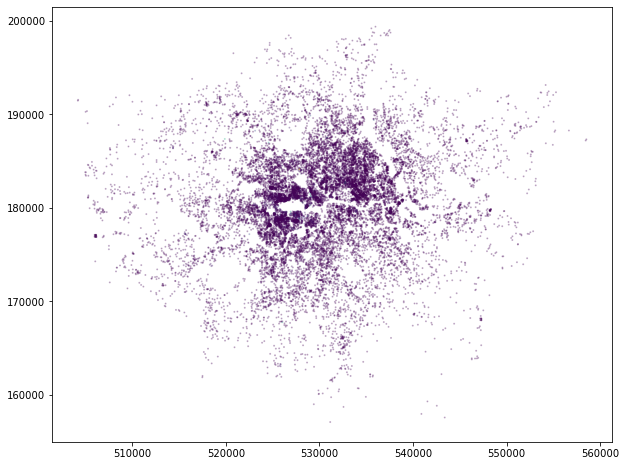

In [48]:
gdf.to_crs('EPSG: 27700').plot(column='price', cmap='viridis', alpha=0.25, markersize=1, figsize=(12,8));

There are 20298 missing values in column 'reviews_per_month' in IA_2019. Obviously, We are not able to check each listing manually. 

Yet from the date frame table, it seems like they are a large number of listings which have no review at all but have other normal information, such as various room types and different prices. Can the 'no review' be evidence of inactiveness? Maybe they are just “part-time” Airbnb houses and have little bookings. 

Considering our aim is to calculate the occupancy rate for each listing and get the average occupancy rate for all the listings in each ward to represent the tourist’s preference, the amount of listings would affect the result directly. 

Additionaly, on the map above, it's shown that these listings locate around London.

Therefore, these ‘0-review’ listings are reserved and whose number of review/occupancy rate would be calculated as zero.

##### deal with df1 (2022 dataset)

In [55]:
# drop rows in df1 (2022 dataset)
df1.drop(df1[df1.number_of_reviews_ltm.isna()].index.array, axis=0, inplace=True)
# check
df1[df1.number_of_reviews_ltm.isna()]

/tmp/ipykernel_467/3931092351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1.number_of_reviews_ltm.isna()].index.array, axis=0, inplace=True)


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month


##### deal with df2 (2019 dataset)

In [56]:
df2.columns.get_loc("reviews_per_month")

13

In [57]:
df2.columns.get_loc("number_of_reviews")

11

In [52]:
# set 0 value to 'reviews_per_month' field for these "no-review" listings in df2 (2019 dataset)
# but there should be a more reproducable way to define rows with NA. For example, used the index of rows with NA.
df2.iloc[64938:85236,13] = 0

In [53]:
# check
df2.reviews_per_month.isna().sum()

0

### the occupancy model

The Occupancy Model is constructed by following the modified methodology from Inside Airbnb and ...

1. review rate

    A review rate of 50% is used to convert reviews to estimated bookings.

2. The average length of stay
The average length of stay is assumed as 5.3 days in this study and is taken from the Airbnb report and London first report.
Airbnb reported 5.4 nights as the average length of stay for guests using Airbnb in London, but the study examined data from November 2012 to October 2013.
London First study gave a figure of 5.3 nights on the average length of stay for international guests using Airbnb accommodation in London in 2019.

3. If a listing has a higher minimum nights value than the average length of stay, the minimum nights value was used instead.

#### estimate the length of stay

According to our third assumption in Occupancy model, if a listing has a higher minimum nights value than the average length of stay (5.3 days), the minimum nights value was used instead.

<AxesSubplot:>

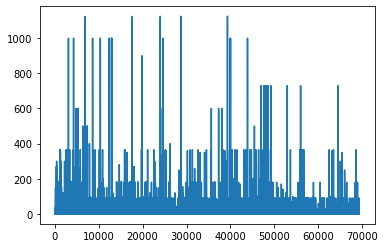

In [101]:
# have a look first
df1.minimum_minimum_nights.plot.line()

There are many listings set minumum nights as 365 or more than 1000 days, which must be an unreal situation. I assumpt it to be a temporary restrictions on booking. For these listings, we still use average length of stay as the estimate of length of stay. Additionaly, 90-days Airbnb Rule should also be considered. 
Therefore, we set the rule as below.

<AxesSubplot:>

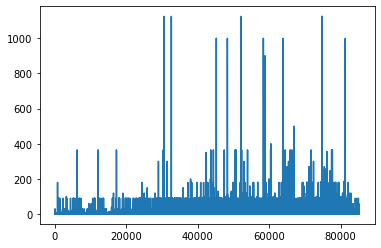

In [102]:
df2.minimum_nights.plot.line()

In [106]:
result = []
for n in df1.minimum_minimum_nights:
    if n < 5.3 or n > 90:
        result.append(5.3)
    else:
        night = n 
        result.append(night)
        
df1["leng_stay"] = result
df1[["leng_stay","minimum_nights"]].head(10)

/tmp/ipykernel_467/3606302505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leng_stay"] = result


,leng_stay,minimum_nights
0,5.3,1
1,5.3,3
2,5.3,5
3,5.3,3
4,5.3,4
5,5.3,4
6,5.3,2
7,14.0,14
8,5.3,3
9,5.3,3


In [103]:
result = []
for n in df2.minimum_nights:
    if n < 5.3 or n > 90:
        result.append(5.3)
    else:
        night = n 
        result.append(night)
        
df2["leng_stay"] = result
df2[["leng_stay","minimum_nights"]].head()

,leng_stay,minimum_nights
0,5.3,1.0
1,5.3,1.0
2,7.0,7.0
3,14.0,14.0
4,5.3,3.0


#### Calculate the occupancy rate

In [107]:
review_rate = 0.5

# Airbnb 2022 
df1['total_bookings_2022'] = df1['number_of_reviews_ltm']/ review_rate
df1['occupancy_rate_2022'] = df1['total_bookings_2022'] * df1['leng_stay']/ 365
df1[['occupancy_rate_2022','total_bookings_2022','number_of_reviews_ltm']]

/tmp/ipykernel_467/1453605176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_bookings_2022'] = df1['number_of_reviews_ltm']/ review_rate
/tmp/ipykernel_467/1453605176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupancy_rate_2022'] = df1['total_bookings_2022'] * df1['leng_stay']/ 365


,occupancy_rate_2022,total_bookings_2022,number_of_reviews_ltm
0,0.261370,18.0,9.0
1,0.000000,0.0,0.0
2,0.029041,2.0,1.0
3,0.000000,0.0,0.0
4,0.232329,16.0,8.0
...,...,...,...
69353,0.029041,2.0,1.0
69354,0.348493,24.0,12.0
69355,0.174247,12.0,6.0
69356,0.116164,8.0,4.0


In [108]:
# Airbnb 2019 
df2['total_bookings_2019'] = df2['reviews_per_month']*12/review_rate
df2['occupancy_rate_2019'] = df2['total_bookings_2019'] * df2['leng_stay']/ 365
df2[['occupancy_rate_2019','total_bookings_2019','number_of_reviews','reviews_per_month','minimum_nights']]

,occupancy_rate_2019,total_bookings_2019,number_of_reviews,reviews_per_month,minimum_nights
0,0.791079,54.48,47.0,2.27,1.0
1,2.272175,156.48,131.0,6.52,1.0
2,0.234740,12.24,8.0,0.51,7.0
3,0.368219,9.60,5.0,0.40,14.0
4,0.529710,36.48,16.0,1.52,3.0
...,...,...,...,...,...
85231,0.000000,0.00,0.0,0.00,3.0
85232,0.000000,0.00,0.0,0.00,2.0
85233,0.000000,0.00,0.0,0.00,3.0
85234,0.000000,0.00,0.0,0.00,2.0


### Join Airbnb listings with ward

#### read in London ward geodata

In [109]:
# Add London Ward Boundary Data
# this can be deleted after combining our notebooks.
londonward = gpd.read_file( cache_data(spath+'londonward.gpkg?raw=true', ddir) )

Found data/londonward.gpkg locally!


In [110]:
londonward.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

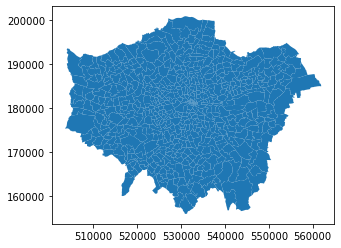

In [111]:
londonward.plot()

#### transfer csv to geodata

In [113]:
gdf_Airbnb2022 = gpd.GeoDataFrame(df1, 
      geometry=gpd.points_from_xy(df1.longitude, df1.latitude, crs='epsg:4326'))

In [114]:
gdf_Airbnb2019 = gpd.GeoDataFrame(df2, 
      geometry=gpd.points_from_xy(df2.longitude, df2.latitude, crs='epsg:4326'))

In [115]:
for g in [gdf_Airbnb2019]:
    print(g.crs)

epsg:4326


In [116]:
print(gdf_Airbnb2022.geometry.crs)
print(gdf_Airbnb2022.total_bounds)
print(gdf_Airbnb2019.geometry.crs)
print(gdf_Airbnb2019.total_bounds)

epsg:4326
[-5.236000e-01  2.000000e+00  1.125000e+03  5.170893e+01]
epsg:4326
[-0.49668 51.29479  0.28539 51.68169]


#### reproject the Airbnb

In [118]:
# check its crs
gdf_Airbnb2019 = gdf_Airbnb2019.to_crs('EPSG:27700')
gdf_Airbnb2022 = gdf_Airbnb2022.to_crs('EPSG:27700')
print(gdf_Airbnb2019.geometry.crs)
print(gdf_Airbnb2019.total_bounds)
print(gdf_Airbnb2022.geometry.crs)
print(gdf_Airbnb2022.total_bounds)

EPSG:27700
[504189.9384281  157077.66437635 558509.91187284 199932.45808543]
EPSG:27700
[  502615.87511762 -5304347.19481622               inf               inf]


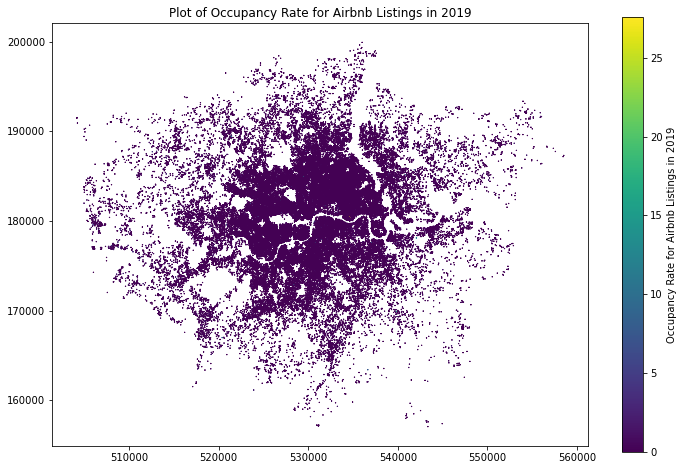

In [119]:
ax = gdf_Airbnb2019.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='occupancy_rate_2019', cmap='viridis', 
         legend=True, legend_kwds={"label": "Occupancy Rate for Airbnb Listings in 2019"});  #legend_kwds: legend keywords
ax.set_title("Plot of Occupancy Rate for Airbnb Listings in 2019");

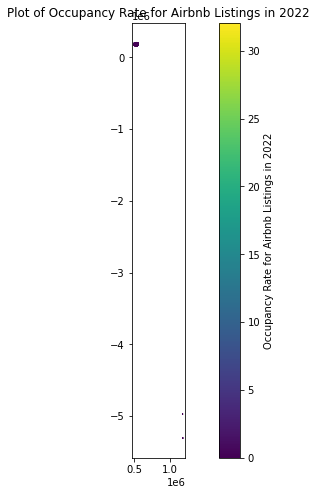

In [120]:
ax = gdf_Airbnb2022.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='occupancy_rate_2022', cmap='viridis', 
         legend=True, legend_kwds={"label": "Occupancy Rate for Airbnb Listings in 2022"});  #legend_kwds: legend keywords
ax.set_title("Plot of Occupancy Rate for Airbnb Listings in 2022");

In [ ]:
# Plot Airbnb listings and London ward to the same axes

# Creates a new figure with specified number of subplots and the specified size (in inches by default).
fig, ax = plt.subplots(1,1, figsize=(12,9))

gdf_Airbnb2019.plot(column='occupancy_rate_2019', marker='*', markersize=0.25, cmap='viridis', ax=ax)
londonward.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=1.5, ax=ax)

#### join

In [ ]:
Airbnb2019_in_ward = gdf_Airbnb2019.sjoin(londonward, how="inner", predicate='intersects')
Airbnb2019_in_ward.head()

In [ ]:
# calculate the average occupancy rate in each ward
aver_occup_rate_2019 = Airbnb2019_in_ward.groupby('GSS_CODE')['occupancy_rate_2019'].mean()
aver_occup_rate_2019.head()

In [ ]:
# join the average rate back to ward
Ward_Airbnb_2019 = londonward.merge(aver_occup_rate_2019, on='GSS_CODE', how='left')
Ward_Airbnb_2019.head()

In [ ]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(15,9))
fig.suptitle(f"Average Occupancy Rate of Airbnb Listings in 2019", fontsize=20, y=0.92)
Ward_Airbnb_2019.plot(ax=ax, column='occupancy_rate_2019',legend=True)

# Save the image
os.makedirs('img')
plt.savefig(os.path.join('output_img','occupancy_rate_2019.png'), dpi=300)